In [1]:
# Depending on your hardware specs install either tensorflow (CPU) or tensorflow_gpu (GPU) version

# In this notebook, we use tensorflow_gpu. Make sure that GPU hardware acceleration is enabled in your Google Colab notebook
# by checking "Runtime -> Change runtime type" and selecting "GPU accelerator"
!pip install tensorflow-gpu

# Install Trains open-source experiment management tool that will help us in performing model comparison.
!pip install trains

     |████████████████████████████████| 320.4MB 49kB/s 
     |████████████████████████████████| 798kB 11.3MB/s 
     |████████████████████████████████| 92kB 12.9MB/s 


In [2]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist.
# We clone from a forked repo because the official tf repo doesn't support per object
# statistics in eval. 
# Take a look into this issue on TF OD API git for additional details:
# https://github.com/tensorflow/models/issues/4778#issuecomment-430262110

if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/sachin327/models
  !git clone --depth 1 https://github.com/sachin327/scripts
  !git clone --depth 1 https://github.com/sachin327/workspace

# By default the cloned repository is located in /content/models/
# The TF OD API part of the repo is located in /content/models/research/object_detection/
# Usually, all the scripts are ran from /content/models/research/ as the base directory
# In order to explore the scripts in the OD API, you can use the Files navigation bar
# on the left side of the Google Colab notebook.
# Double-clicking a file will open a scratch editor on the right side of the Google Colab notebook.

%cd '//content/models/research'

# COCO is a large image dataset designed for object detection, segmentation, person keypoints detection, stuff segmentation, and caption generation. 
# TF 2 OD API uses PythonAPI pycocotools for performing evaluation of the object detection models.
# By default, pycocotools do not support per object statistic in eval, so we replace cocoeval.py script with a custom one that does support it.
!cp ./object_detection/metrics/cocoeval.py /usr/local/lib/python3.6/dist-packages/pycocotools/

Cloning into 'models'...
remote: Enumerating objects: 2797, done.
remote: Counting objects: 100% (2797/2797), done.
remote: Compressing objects: 100% (2458/2458), done.
remote: Total 2797 (delta 566), reused 1938 (delta 303), pack-reused 0
Receiving objects: 100% (2797/2797), 57.73 MiB | 8.75 MiB/s, done.
Resolving deltas: 100% (566/566), done.
Cloning into 'scripts'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
Cloning into 'workspace'...
remote: Enumerating objects: 230, done.
remote: Counting objects: 100% (230/230), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 230 (delta 107), reused 223 (delta 103), pack-reused 0
Receiving objects: 100% (230/230), 966.50 KiB | 896.00 KiB/s, done.
Resolving deltas: 100% (107/107), done.
/content/models/research


In [3]:
%%bash
# Compile protos.
protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow 2 Object Detection API.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1533997 sha256=8d22d29083044d0a2fda1ffead16c36979047733bacbf30ef4dfb63f149e5c7f
  Stored in directory: /tmp/pip-ephem-wheel-cache-xdm5849q/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for py-cpuinfo: filename=py_cpuinfo-7.0.0-cp36-none-any.whl size=20071 sha256=96f3e85f448db86c531251993ecab7098534b59bc402a04640dae5e6933ae024
  Stored in directory: /root/.cache/pip/wheels/f1/93/7b/127daf0c3a5a49feb2fecd468d508067c733fba5192f726ad1
Successfully built object-detection py-cpuinfo


object_detection/protos/input_reader.proto: warning: Import object_detection/protos/image_resizer.proto but not used.


In [4]:
# Test the TF2 OD API installation
!python object_detection/builders/model_builder_tf2_test.py

2020-10-08 06:01:07.990588: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2020-10-08 06:01:10.181455: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-08 06:01:10.234902: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-08 06:01:10.235522: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P4 computeCapability: 6.1
coreClock: 1.1135GHz coreCount: 20 deviceMemorySize: 7.43GiB deviceMemoryBandwidth: 178.99GiB/s
2020-10-08 06:01:10.235564: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully 

In [5]:
'''# Download all the EfficientDet checkpoints and uncompress them
%cd ./object_detection/models/checkpoints/detection/

# We use a simple bash script that downloads and uncompresses all the EfficientDet
# checkpoints for us
!bash download_all_efficientdet_checkpoints.sh'''

'# Download all the EfficientDet checkpoints and uncompress them\n%cd ./object_detection/models/checkpoints/detection/\n\n# We use a simple bash script that downloads and uncompresses all the EfficientDet\n# checkpoints for us\n!bash download_all_efficientdet_checkpoints.sh'

In [6]:
%cd '//content/scripts/preprocessing'

/content/scripts/preprocessing


In [7]:
!python generate_tfrecord.py -x '//content/workspace/training_demo/images/train' -l '//content/workspace/training_demo/annotations/label_map.pbtxt' -o '//content/workspace/training_demo/annotations/train.record'

Successfully created the TFRecord file: //content/workspace/training_demo/annotations/train.record


In [8]:
!python generate_tfrecord.py -x '//content/workspace/training_demo/images/test' -l '//content/workspace/training_demo/annotations/label_map.pbtxt' -o '//content/workspace/training_demo/annotations/test.record'

Successfully created the TFRecord file: //content/workspace/training_demo/annotations/test.record


In [9]:
%cd '//content/workspace/training_demo'

/content/workspace/training_demo


In [10]:
!wget -nc 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz' -O ./models/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

--2020-10-08 06:02:51--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.200.128, 2404:6800:4003:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.200.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46042990 (44M) [application/x-tar]
Saving to: ‘./models/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’

./models/ssd_mobile 100%[===================>]  43.91M  11.3MB/s    in 3.9s    

2020-10-08 06:02:55 (11.3 MB/s) - ‘./models/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’ saved [46042990/46042990]



In [13]:
%cd '//content/workspace/training_demo'

/content/workspace/training_demo


In [15]:
!tar -xvf  ./models/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz -C ./pre-trained-model

ssd_mobilenet_v2_320x320_coco17_tpu-8/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [16]:
cp ./pre-trained-model/ssd_mobilenet_v2_320x320_coco17_tpu-8/pipeline.config ./models/my_ssd_mobilenet_v2

In [19]:
'''Now its time to update your '//content/workspace/training_demo/models/my_ssd_mobilenet_v2/pipline.config' file
first open your file 
1. change num_classes acccording to your model
2. change batch_size to 2-8
3. fine_tune_checkpoint: "pre-trained-model/ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0"
4. fine_tune_checkpoint_type: "detection"
5. in train_input_reader
    1. label_map_path: "annotations/label_map.pbtxt"
    2. input_path: "annotations/train.record"
6. in eval_input_reader
    1. label_map_path: "annotations/label_map.pbtxt"
    2. input_path: "annotations/test.record"
'''

'Now its time to update your \'//content/workspace/training_demo/models/my_ssd_mobilenet_v2/pipline.config\' file\nfirst open your file \n1. change num_classes acccording to your model\n2. change batch_size to 2-8\n3. fine_tune_checkpoint: "pre-trained-model/ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0"\n4. fine_tune_checkpoint_type: "detection"\n5. in train_input_reader\n    1. label_map_path: "annotations/label_map.pbtxt"\n    2. input_path: "annotations/train.record"\n6. in eval_input_reader\n    1. label_map_path: "annotations/label_map.pbtxt"\n    2. input_path: "annotations/test.record"\n'

In [20]:
!python model_main_tf2.py --model_dir=models/my_ssd_mobilenet_v2 --pipeline_config_path=models/my_ssd_mobilenet_v2/pipeline.config

2020-10-08 06:33:52.283491: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-08 06:33:54.200875: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-08 06:33:54.222834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-08 06:33:54.223435: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P4 computeCapability: 6.1
coreClock: 1.1135GHz coreCount: 20 deviceMemorySize: 7.43GiB deviceMemoryBandwidth: 178.99GiB/s
2020-10-08 06:33:54.223468: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-08 06:33:54.234376: I tensorflow/stream_executor/platform/defaul

In [21]:
%cd '//content/workspace/training_demo'

/content/workspace/training_demo


In [22]:
!python ./exporter_main_v2.py --input_type=image_tensor --pipeline_config_path=./models/my_ssd_mobilenet_v2/pipeline.config --trained_checkpoint_dir=./models/my_ssd_mobilenet_v2/ --output_directory=./exported-model/my_model

2020-10-08 07:00:33.541687: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-08 07:00:35.347041: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-08 07:00:35.368912: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-08 07:00:35.369511: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P4 computeCapability: 6.1
coreClock: 1.1135GHz coreCount: 20 deviceMemorySize: 7.43GiB deviceMemoryBandwidth: 178.99GiB/s
2020-10-08 07:00:35.369550: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-08 07:00:35.371280: I tensorflow/stream_executor/platform/defaul

In [23]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [24]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = "//content/workspace/training_demo/exported-model/my_model/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 9.799667358398438 seconds


In [25]:
category_index = label_map_util.create_category_index_from_labelmap("//content/workspace/training_demo/annotations/label_map.pbtxt",
                                                                    use_display_name=True)

In [26]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
image_np = np.array(Image.open("//content/workspace/training_demo/images/train/BloodImage_00010.jpg"))

# Things to try:
# Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
detections['num_detections'] = num_detections

    # detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=20,
      min_score_thresh=.30,
      agnostic_mode=False)


print('Done')


Done


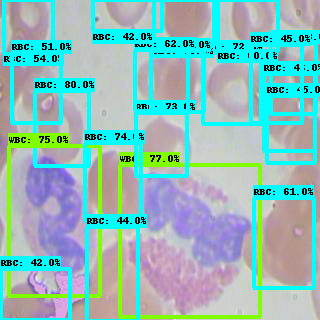

In [37]:
Image.fromarray(image_np_with_detections)

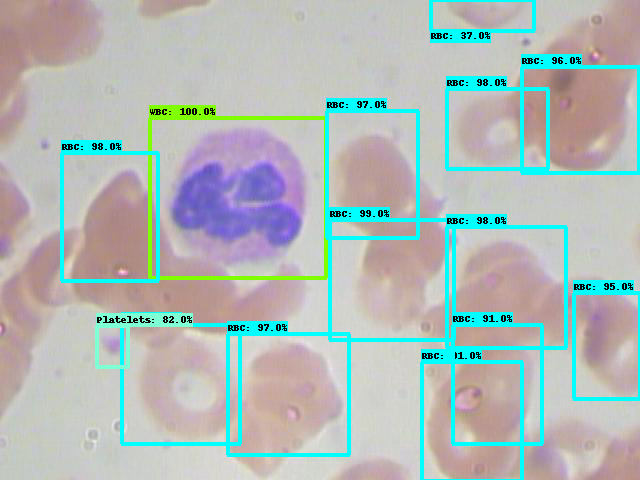

In [ ]:
a

In [30]:
%cd 

/root


In [31]:
from google.colab import files
#For the folder you have to zip it first and can only download later on
!zip -r my_model.zip '//content/workspace/training_demo/exported-model/my_model'
#Download files
files.download('my_model.zip')

  adding: training_demo/exported-model/my_model/ (stored 0%)
  adding: training_demo/exported-model/my_model/pipeline.config (deflated 68%)
  adding: training_demo/exported-model/my_model/checkpoint/ (stored 0%)
  adding: training_demo/exported-model/my_model/checkpoint/checkpoint (deflated 41%)
  adding: training_demo/exported-model/my_model/checkpoint/ckpt-0.data-00000-of-00001 (deflated 7%)
  adding: training_demo/exported-model/my_model/checkpoint/ckpt-0.index (deflated 78%)
  adding: training_demo/exported-model/my_model/saved_model/ (stored 0%)
  adding: training_demo/exported-model/my_model/saved_model/assets/ (stored 0%)
  adding: training_demo/exported-model/my_model/saved_model/saved_model.pb (deflated 92%)
  adding: training_demo/exported-model/my_model/saved_model/variables/ (stored 0%)
  adding: training_demo/exported-model/my_model/saved_model/variables/variables.index (deflated 76%)
  adding: training_demo/exported-model/my_model/saved_model/variables/variables.data-0000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>